In [2]:
import numpy as np
import pandas as pd
import sklearn
import joblib
from stable_bloom_filter import stable_bloom_filter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
data = pd.read_csv("Dataset/e_shop_clothing_2008.csv",sep=";")
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [5]:
data.rename(columns = {'page 1 (main category)':'category', 'page 2 (clothing model)':'model'}, inplace = True)
sel_cols=data[['category','model','colour']]
sel_cols.head()

,category,model,colour
0,1,A13,1
1,1,A16,1
2,2,B4,10
3,2,B17,6
4,2,B8,4


In [6]:
unq=sel_cols.drop_duplicates()
print(len(unq),len(sel_cols))

218 165474


This implies that the data is dense in terms of duplicates.

In [8]:
duplicate=[]
unq_clicks={}
for index, row in sel_cols.iterrows():
    u=str(row['category'])+row['model']+str(row['colour'])
    try:
        unq_clicks[u]+=1
        duplicate.append(1)
    except KeyError:
        unq_clicks[u]=1
        duplicate.append(0)
sel_cols['is_duplicate']=duplicate

D:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
sel_cols.to_csv(r'Dataset/clickstream_is_duplicate.csv')
sel_cols

,category,model,colour,is_duplicate
0,1,A13,1,0
1,1,A16,1,0
2,2,B4,10,0
3,2,B17,6,0
4,2,B8,4,0
...,...,...,...,...
165469,2,B10,2,1
165470,1,A11,3,1
165471,1,A2,3,1
165472,3,C2,12,1


In [11]:
np.unique(sel_cols['model'])

array(['A1', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
       'A18', 'A19', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25',
       'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33',
       'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41',
       'A42', 'A43', 'A5', 'A6', 'A7', 'A8', 'A9', 'B1', 'B10', 'B11',
       'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B19', 'B2', 'B20',
       'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29',
       'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B9', 'C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24',
       'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32',
       'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40',
       'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49',
       'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57',
       'C58', 'C59', '

In [16]:
label_encoder = preprocessing.LabelEncoder()
sel_cols['model']= label_encoder.fit_transform(sel_cols['model'])

D:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
sel_cols

,category,model,colour,is_duplicate
0,1,4,1,0
1,1,7,1,0
2,2,70,10,0
3,2,51,6,0
4,2,74,4,0
...,...,...,...,...
165469,2,44,2,1
165470,1,2,3,1
165471,1,11,3,1
165472,3,87,12,1


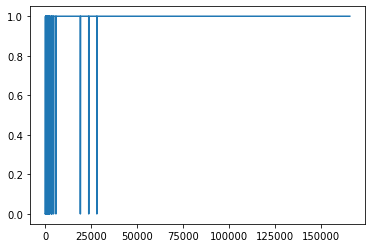

In [18]:
import matplotlib.pyplot as plt
plt.plot(sel_cols['is_duplicate'])
plt.show()

There is mostly duplicates after around 32500 insertions. We can also see that the uniques are condensed during the earlier insertions. That will always be the case even after shuffling the data since uniques are very less in number.

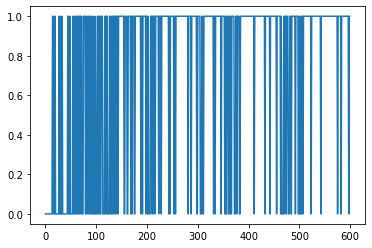

In [33]:
sel_cols_short=sel_cols[0:600]
plt.plot(sel_cols_short['is_duplicate'])
plt.show()

In [34]:
unq=sel_cols_short.drop_duplicates()
print(len(unq),len(sel_cols_short))

282 600


In [25]:
X = sel_cols_short.loc[:, sel_cols_short.columns != 'is_duplicate']
y = sel_cols_short.loc[:, sel_cols_short.columns == 'is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [27]:
model_labels=np.unique(sel_cols['model'])

In [28]:
predictions = logreg.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.96      1.00      0.98      1735

    accuracy                           0.96      1800
   macro avg       0.48      0.50      0.49      1800
weighted avg       0.93      0.96      0.95      1800



D:\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
